In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_pickle('all_trips.pkl')

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


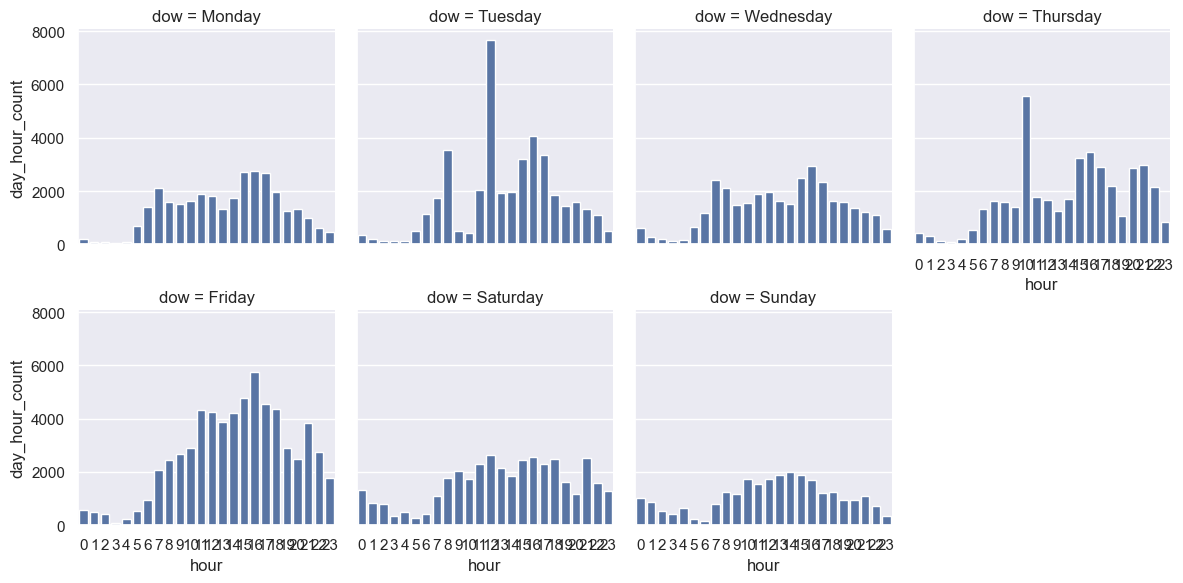

In [3]:
df['dow'] = df.trip_start_time.dt.day_name()
df['hour'] = df.trip_start_time.dt.hour
ax  = sns.FacetGrid(data=df.groupby([
    'dow',
    'hour'
]).hour.count().to_frame(name='day_hour_count').reset_index(), col='dow', col_order=[
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], col_wrap=4)
ax.map(sns.barplot, 'hour', 'day_hour_count');

In [4]:
daily = df.set_index('trip_start_time').groupby(pd.Grouper(freq='D')).size()
daily = pd.DataFrame(daily)
daily = daily.reset_index()
daily.columns = ['ds', 'y']
daily

,ds,y
0,2024-02-20,18726
1,2024-02-21,25549
2,2024-02-22,25849
3,2024-02-23,24684
4,2024-02-24,18907
5,2024-02-25,13907
6,2024-02-26,17171
7,2024-02-27,10571
8,2024-02-28,0
9,2024-02-29,4272


In [5]:
m = Prophet()
m.fit(daily)

20:37:03 - cmdstanpy - INFO - Chain [1] start processing
20:37:03 - cmdstanpy - INFO - Chain [1] done processing


In [6]:

future = m.make_future_dataframe(periods=5)
future

,ds
0,2024-02-20
1,2024-02-21
2,2024-02-22
3,2024-02-23
4,2024-02-24
5,2024-02-25
6,2024-02-26
7,2024-02-27
8,2024-02-28
9,2024-02-29


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
25,2024-03-16,-1019.596637,-6931.302590,4685.586692
26,2024-03-17,-5017.741523,-10641.637341,1323.247935
27,2024-03-18,-3311.919515,-9369.789703,2616.879092
28,2024-03-19,-6873.312592,-12949.127519,-1017.087298
29,2024-03-20,-8838.162182,-14928.202111,-2979.691926


/opt/homebrew/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


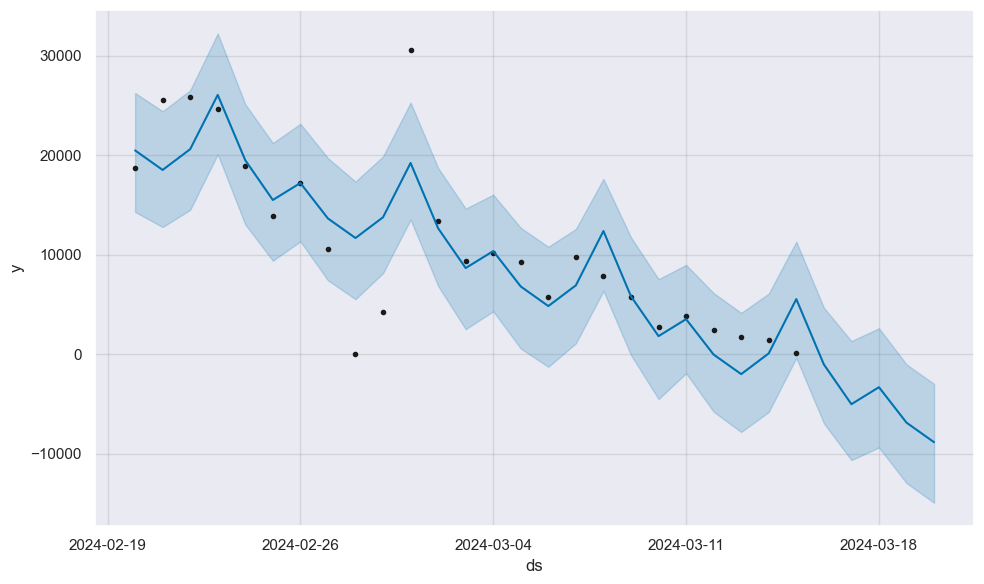

In [8]:
fig1 = m.plot(forecast)

In [9]:
hourly = df.set_index('trip_start_time').groupby(pd.Grouper(freq='2h')).size()
hourly = pd.DataFrame(hourly)
hourly = hourly.reset_index()
hourly.columns = ['ds', 'y']
hourly.head()

,ds,y
0,2024-02-20 10:00:00,1372
1,2024-02-20 12:00:00,2831
2,2024-02-20 14:00:00,3561
3,2024-02-20 16:00:00,5256
4,2024-02-20 18:00:00,2486


In [10]:
mh = Prophet()
mh.fit(hourly)

20:37:14 - cmdstanpy - INFO - Chain [1] start processing


20:37:14 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
futureh = mh.make_future_dataframe(periods=12)
futureh

,ds
0,2024-02-20 10:00:00
1,2024-02-20 12:00:00
2,2024-02-20 14:00:00
3,2024-02-20 16:00:00
4,2024-02-20 18:00:00
...,...
295,2024-03-23 08:00:00
296,2024-03-24 08:00:00
297,2024-03-25 08:00:00
298,2024-03-26 08:00:00


In [12]:
forecasth = mh.predict(future)
forecasth[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2024-02-20,1482.181624,545.867135,2524.695695
1,2024-02-21,1151.962351,183.304819,2138.936366
2,2024-02-22,918.362083,-68.300796,1911.135875
3,2024-02-23,1422.177940,485.417990,2474.432130
4,2024-02-24,1579.074607,574.010836,2490.244374
5,2024-02-25,747.515822,-264.929055,1743.769368
6,2024-02-26,716.179560,-255.759127,1811.246323
7,2024-02-27,746.253687,-306.617452,1725.359485
8,2024-02-28,418.559570,-616.426853,1312.263490
9,2024-02-29,200.522460,-808.816288,1218.947615


/opt/homebrew/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


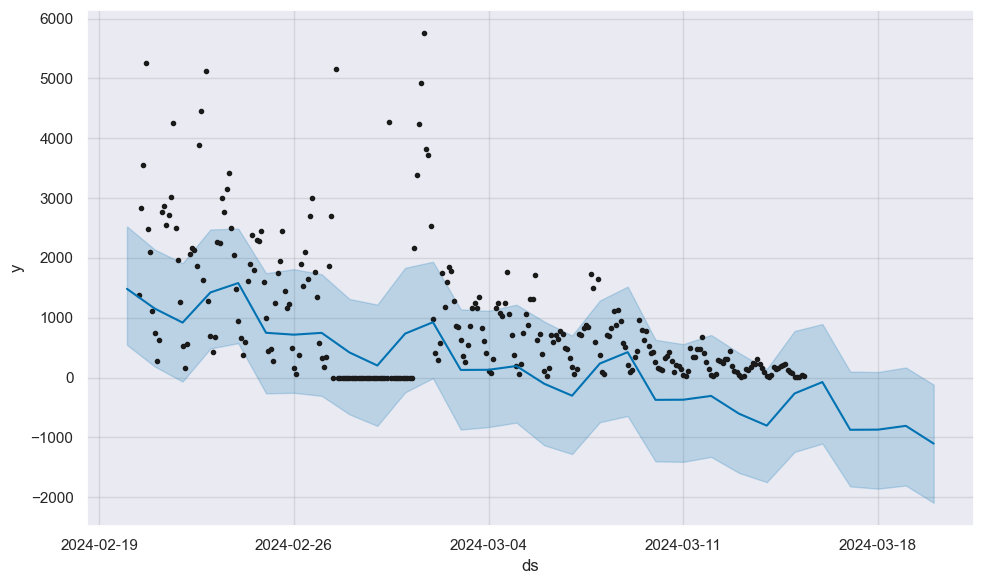

In [13]:
figh = mh.plot(forecasth)

In [18]:
forecast.to_csv('forecast.csv')
forecasth.to_csv('forecasth.csv')
forecast.to_pickle('forecast.pkl')
forecasth.to_pickle('forecasth.pkl')